## The Single Neuron Model Part1. The Perceptron

# The Perception Algorithm
In this notebook we use the Percetron single neuron on a binary cassification task on the iris dataset
----

In [506]:
# First import the standard data science libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

#load data
df=pd.read_csv('Datasets/iris_dataset.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [507]:
target_data=df[['sepal_length','sepal_width','species']]
target_data

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


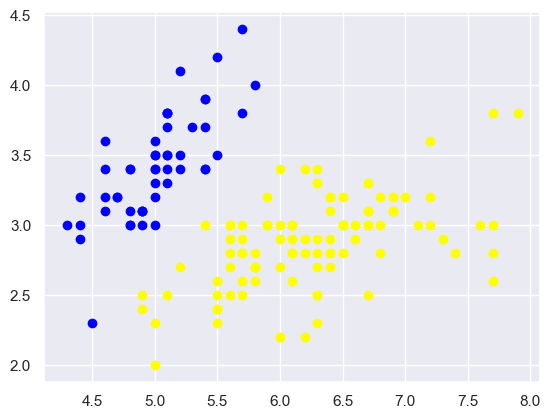

In [508]:
filt= target_data['species']=='setosa'
plt.scatter(target_data.loc[filt,'sepal_length'],target_data.loc[filt,'sepal_width'],color='blue')
plt.scatter(target_data.loc[~filt,'sepal_length'],target_data.loc[~filt,'sepal_width'],color='yellow')

In [509]:
#The species names are:
target_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [510]:
target_data=target_data[target_data['species'].isin(['setosa','versicolor'])]
target_data

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
95,5.7,3.0,versicolor
96,5.7,2.9,versicolor
97,6.2,2.9,versicolor
98,5.1,2.5,versicolor


In [511]:
# A simple function to map species name to numbers
def species_to_number(species):
    if species=='setosa':
        return 1
    else:
        return -1
target_data['species']=target_data['species'].apply(species_to_number)
target_data

C:\Users\pangnaiwen\AppData\Local\Temp\ipykernel_28760\671812329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['species']=target_data['species'].apply(species_to_number)


,sepal_length,sepal_width,species
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
95,5.7,3.0,-1
96,5.7,2.9,-1
97,6.2,2.9,-1
98,5.1,2.5,-1


In [512]:
# Create Numpy arrays for the features and the target
X=target_data[['sepal_length','sepal_width']].values
y=target_data['species'].values
print(f"{X.shape=},{y.shape=}")

X.shape=(100, 2),y.shape=(100,)


In [513]:
X[0]

array([5.1, 3.5])

In [514]:
class Perceptron(object):
    def __init__(self,epochs,epsilon):
        self.epochs=epochs
        self.epsilon=epsilon
    
    def train(self,X,y):
        self.w=np.random.rand(2)
        self.b=np.random.rand()
        for _ in range(self.epochs):
            total_error=0
            for i in range(len(X)):
                z=self.w.dot(X[i])+self.b
                y_hat=1 if z>0 else -1
                self.w=self.w-(1/2)*(y_hat-y[i])*X[i]
                self.b=self.b-(1/2)*(y_hat-y[i])
                total_error += 1/4 * (y_hat-y[i])**2
            if total_error<self.epsilon:
                break
        return self
    
    def predict(self,X):
        z=np.dot(X,self.w)+self.b
        return np.where(z>=0,1,-1)
    
perceptron=Perceptron(epochs=1000,epsilon=0.01)
perceptron.train(X,y)
perceptron.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

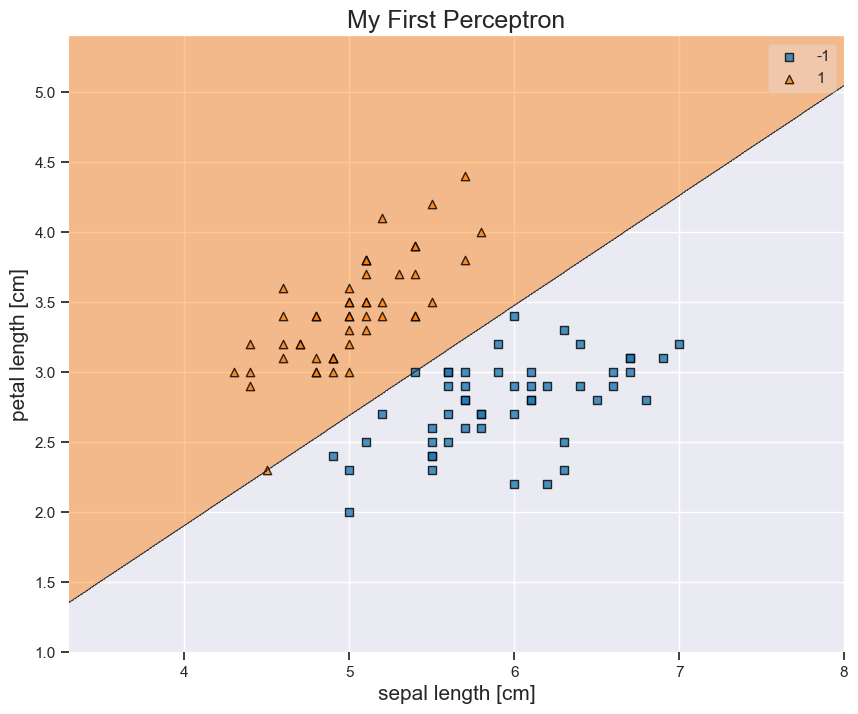

In [515]:
# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = perceptron)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()